# 作业三：参数估计 & 非参数估计
- 姓名：韩佳迅
- 学号：2012682
- 专业：计算机科学与技术

### 实验要求
题目：参数估计和非参数估计

#### 基本要求：
生成两个各包含 N=1200 个二维随机向量的数据集合$X_1$和$X_2$，数据集合中随机向量来自于三个分布模型，分别满足均值向量 $μ_1 = [1,4]$ , $μ_2 = [4,1]$ , $μ_3=[8,4]$ 和协方差矩阵 $D_1=D_2=D_3=2I$，其中 $I$ 是  2∗2 的单位矩阵。在生成数据集合  X1  时，假设来自三个分布模型的先验概率相同 ；而在生成数据集合  X2  时，先验概率如下： $p(w_1)=0.6 $,  $p(w_2)=0.1$ ,  $p(w_3)=0.3$

1. 在两个数据集合上分别应用“似然率测试规则” 、“最大后验概率规则” 进行分类实验，计算分类错误率，分析实验结果。
2. 在两个数据集合上分别应用  $h=1$  时的方窗核函数或高斯核函数估计方法，应用“似然率测试规则”进行分类实验，计算分类错误率，分析实验结果。

#### 中级要求

1. 根据初级要求中使用的一个核函数，在数据集  $X_2$ 上应用交叉验证法，在  $h∈[0.1,0.5,1,1.5,2]$  中寻找最优的h值。

#### 高级要求

1. 任选一个数据集，在该数据集上应用k-近邻概率密度估计，任选3个k值输出概率密度分布图。



**截止日期：11月4日**
- 发送到邮箱：2120220594@mail.nankai.edu.cn

### 导入相关包

In [1]:
import numpy as np
import sys
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

### 生成数据集

In [2]:
# 生成正态分布数据
def Generate_Sample_Gaussian(mean, cov, P, label):
    '''
        mean 为均值向量
        cov 为方差矩阵a
        P 为单个类的先验概率
        return 单个类的数据集
    '''
    temp_num = round(1200 * P)
    x, y = np.random.multivariate_normal(mean, cov, temp_num).T
    z = np.ones(temp_num) * label
    X = np.array([x, y, z])
    return X.T

In [3]:
def Generate_DataSet_plot(mean, cov, P):
    # 画出不同先验对应的散点图
    xx = []
    label = 1
    for i in range(3):
        xx.append(Generate_Sample_Gaussian(mean[i], cov, P[i], label))
        label += 1
        i = i + 1
    # 画图
    plt.figure()
    for i in range(3):
        plt.plot(xx[i][:, 0], xx[i][:, 1], '.', markersize=4.)
        plt.plot(mean[i][0], mean[i][1], 'r*')
    plt.show()
    return xx

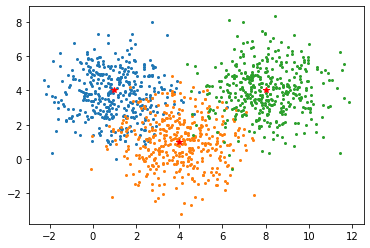

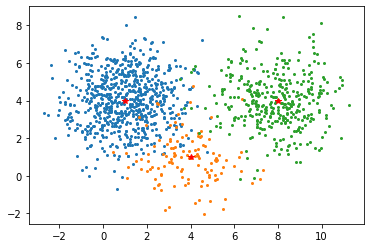

In [4]:
mean = np.array([[1, 4], [4, 1], [8, 4]])  # 均值数组
cov = [[2, 0], [0, 2]]  # 方差矩阵
num = 1200  # 样本个数
P1 = [1 / 3, 1 / 3, 1 / 3]  # 样本X1的先验概率
P2 = [0.6, 0.1, 0.3]  # 样本X2的先验概率
X1 = np.array(Generate_DataSet_plot(mean, cov, P1), dtype=object)
X2 = np.array(Generate_DataSet_plot(mean, cov, P2), dtype=object)
X1 = np.vstack(X1)
X2 = np.vstack(X2)

In [5]:
X1.shape, X2.shape  # 前两列是坐标，最后一列是标签

((1200, 3), (1200, 3))

### 基本要求：
生成两个各包含 N=1200 个二维随机向量的数据集合$X_1$和$X_2$，数据集合中随机向量来自于三个分布模型，分别满足均值向量 $μ_1 = [1,4]$ , $μ_2 = [4,1]$ , $μ_3=[8,4]$ 和协方差矩阵 $D_1=D_2=D_3=2I$，其中 $I$ 是  2∗2 的单位矩阵。在生成数据集合  X1  时，假设来自三个分布模型的先验概率相同 ；而在生成数据集合  X2  时，先验概率如下： $p(w_1)=0.6 $,  $p(w_2)=0.1$ ,  $p(w_3)=0.3$

1. 在两个数据集合上分别应用“似然率测试规则” 、“最大后验概率规则” 进行分类实验，计算分类错误率，分析实验结果。
2. 在两个数据集合上分别应用  $h=1$  时的方窗核函数或高斯核函数估计方法，应用“似然率测试规则”进行分类实验，计算分类错误率，分析实验结果。



In [6]:
# 极大似然估计
# 输入n*2维数据
def LikelyHood(X):
    mu = np.mean(X, axis=0)
    # python把向量转化成矩阵需要用reshape
    cov = np.array([np.dot((X[i] - mu).reshape(2,1), (X[i] - mu).reshape(1, 2)) for i in range(len(X))]).mean(axis=0)
    return mu, cov

In [7]:
# 二元高斯分布概率密度函数计算
# 在公式中，x和mean应该是列向量，但是为了方便，这里接收的都是行向量（维度：1*2）
def Gaussian_function(x, mu, cov):
    det_cov = np.linalg.det(cov)  # 计算方差矩阵的行列式
    inv_cov = np.linalg.inv(cov)  # 计算方差矩阵的逆
    # 计算概率p(x|w)
    p = 1 / (2 * np.pi * np.sqrt(det_cov)) * np.exp(-0.5 * np.dot(np.dot((x - mu), inv_cov), (x - mu).T))
    return p

In [8]:
# 高斯核概率密度函数计算
# 在公式中，x和mean应该是列向量，但是为了方便，这里接收的都是行向量（维度：1*2）
def Gaussian_Kernel(x, X, h):
    # 计算概率p(x|w)
    p = (1 / (np.sqrt(2 * np.pi) * h)) * np.array([np.exp(-0.5 * np.dot(x - X[i], x - X[i]) / (h**2)) for i in range(len(X))]).mean()
    return p

In [9]:
# 似然率测试规则 分类
def LikeliSort(X):
    myX1=[]
    myX2=[]
    myX3=[]
    # 按标签划分数据集
    for i in range(X.shape[0]):
        if X[i,2]==1:
            myX1.append(X[i,[0,1]])
        if X[i,2]==2:
            myX2.append(X[i,[0,1]])
        if X1[i,2]==3:
            myX3.append(X[i,[0,1]])
    # 按照不同标签的数据集，分别计算对应的u和cov
    u1, cov1 = LikelyHood(np.array(myX1))
    u2, cov2 = LikelyHood(np.array(myX2))
    u3, cov3 = LikelyHood(np.array(myX3))
    
    data = X[:,[0,1]]
    label = X[:,2]
    sortList=[]
    
    # 分别计算三个标签的概率，并据此选最大的那个
    for i in range(X.shape[0]):
        temp = []
        temp.append(   Gaussian_function(data[i], u1, cov1.tolist())  )
        temp.append(   Gaussian_function(data[i], u2, cov2.tolist())  )
        temp.append(   Gaussian_function(data[i], u3, cov3.tolist())  )
        sortList.append(temp.index(max(temp)) + 1)
    res = 1 - np.sum(sortList == label)/label.shape
    return res[0]#返回错误率

In [10]:
# 最大后验概率规则 分类
def MaxPostProSort(X, pre_P):
    myX1=[]
    myX2=[]
    myX3=[]
    # 按标签划分数据集
    for i in range(X.shape[0]):
        if X[i,2]==1:
            myX1.append(X[i,[0,1]])
        if X[i,2]==2:
            myX2.append(X[i,[0,1]])
        if X1[i,2]==3:
            myX3.append(X[i,[0,1]])
    # 按照不同标签的数据集，分别计算对应的u和cov
    u1, cov1 = LikelyHood(np.array(myX1))
    u2, cov2 = LikelyHood(np.array(myX2))
    u3, cov3 = LikelyHood(np.array(myX3))
    
    data = X[:,[0,1]]
    label = X[:,2]
    sortList=[]
    
    # 分别计算三个标签的概率，并据此选最大的那个
    for i in range(X.shape[0]):
        temp = []
        temp.append(  pre_P[0] * Gaussian_function(data[i], u1, cov1.tolist())  )
        temp.append(  pre_P[1] * Gaussian_function(data[i], u2, cov2.tolist())  )
        temp.append(  pre_P[2] * Gaussian_function(data[i], u3, cov3.tolist())  )
        sortList.append(temp.index(max(temp)) + 1)
    res = 1 - np.sum(sortList == label)/label.shape
    return res[0]#返回错误率

In [11]:
# 高斯核函数估计 + “似然率测试规则”分类
def GaussKernelSort(X, h):
    myX1=[]
    myX2=[]
    myX3=[]
    # 按标签划分数据集
    for i in range(X.shape[0]):
        if X[i,2]==1:
            myX1.append(X[i,[0,1]])
        if X[i,2]==2:
            myX2.append(X[i,[0,1]])
        if X[i,2]==3:
            myX3.append(X[i,[0,1]])
    
    data = X[:,[0,1]]
    label = X[:,2]
    sortList=[]
    
    # 分别计算三个标签的概率，并据此选最大的那个
    for i in range(X.shape[0]):
        temp = []
        temp.append(  Gaussian_Kernel(data[i], myX1, h)  )
        temp.append(  Gaussian_Kernel(data[i], myX2, h)  )
        temp.append(  Gaussian_Kernel(data[i], myX3, h)  )
        sortList.append(temp.index(max(temp)) + 1)
    res = 1 - np.sum(sortList == label)/label.shape
    return res[0]#返回错误率

In [12]:
# 似然率测试规则 分类
print("X1数据集上：使用“似然率测试规则”的分类错误率：", LikeliSort(X1) )
print("X2数据集上：使用“似然率测试规则”的分类错误率：", LikeliSort(X2) )

X1数据集上：使用“似然率测试规则”的分类错误率： 0.08416666666666661
X2数据集上：使用“似然率测试规则”的分类错误率： 0.0591666666666667


In [13]:
# 最大后验概率规则 分类
print("X1数据集上：使用“最大后验概率规则” 的分类错误率：", MaxPostProSort(X1,P1) )
print("X2数据集上：使用“最大后验概率规则” 的分类错误率：", MaxPostProSort(X2,P2) )

X1数据集上：使用“最大后验概率规则” 的分类错误率： 0.08416666666666661
X2数据集上：使用“最大后验概率规则” 的分类错误率： 0.04166666666666663


In [14]:
# 高斯核函数估计 + “似然率测试规则”分类
print("X1数据集上：使用“高斯核函数估计” 的分类错误率：", GaussKernelSort(X1,1) )
print("X2数据集上：使用“高斯核函数估计” 的分类错误率：", GaussKernelSort(X2,1) )

X1数据集上：使用“高斯核函数估计” 的分类错误率： 0.08583333333333332
X2数据集上：使用“高斯核函数估计” 的分类错误率： 0.060833333333333295


#### 实验结果分析
> 实验结果见上面打印输出

* 应用“似然率测试规则”和“最大后验概率规则”在X1数据集上的分类结果一致，这是因为X1数据集的先验概率都相同，因此后验概率=似然率，所以据此得出的分类结果也相同

* 当先验概率确定时，分类结果可能会相对更准确一点，例如上面的X2数据集上的错误率要比X1数据集低一些

* 应用似然率测试规则、最大后验概率规则、高斯核函数的分类错误率大致相近


### 中级要求

1. 根据初级要求中使用的一个核函数，在数据集  $X_2$ 上应用交叉验证法，在  $h∈[0.1,0.5,1,1.5,2]$  中寻找最优的h值。

In [15]:
# k折划分数据集
def split_Kflod(num, kflod):
    # 存放kfolds的训练集下标和测试集下标
    train_index=[]
    test_index=[]
    testNum = int(np.floor(num / kflod)) # 测试集大小
    tempCake = [i for i in range(num)] # 用于存放还未被分配给不同测试集的数据下标
    for i in range(kflod):
        wholeCake = np.array([i for i in range(num)])
        # 根据确定好的测试集大小 随机选出 测试集下标
        testIndices = np.random.choice(tempCake, size=testNum, replace=False)
        # 剩余的都作为训练集
        trainIndices = np.delete(wholeCake, testIndices)
        # 维护 还未被分配给不同测试集的数据下标 的列表
        for ele in testIndices:
            tempCake.remove(ele)
        train_index.append(trainIndices)
        test_index.append(testIndices)
    return train_index,test_index

In [16]:
# 交叉验证找最优的h
def best_h(X, kflod):
    hs = [0.1 ,0.5, 1, 1.5, 2]
    
    # 保存当前最好的h值和对应的正确率
    best_h=hs[0]
    best_score=0
    
    # K折划分数据集
    train_indexs,test_indexs = split_Kflod(num, kflod )
    
    # 循环每一个h
    for h in hs:
        curr_score=0
        #每一折的训练以及计算准确率
        for train_index,test_index in zip(train_indexs, test_indexs):
            # 取出训练集和测试集
            X_train = np.array( X[train_index.tolist()] )
            X_test = np.array( X[test_index.tolist()] )
            # 按标签划分训练集
            myX1=[]
            myX2=[]
            myX3=[]
            for i in range(X_train.shape[0]):
                if X_train[i,2]==1:
                    myX1.append(X_train[i,[0,1]])
                if X_train[i,2]==2:
                    myX2.append(X_train[i,[0,1]])
                if X_train[i,2]==3:
                    myX3.append(X_train[i,[0,1]])
            # 使用测试集进行测试并计算准确率   
            data = X_test[:,[0,1]]
            label = X_test[:,2]
            sortList=[]
            # 分别计算三个标签的概率，并据此选最大的那个
            for i in range(X_test.shape[0]):
                temp = []
                temp.append(  Gaussian_Kernel(data[i], myX1, h)  )
                temp.append(  Gaussian_Kernel(data[i], myX2, h)  )
                temp.append(  Gaussian_Kernel(data[i], myX3, h)  )
                sortList.append(temp.index(max(temp)) + 1)
            acc = np.sum(sortList == label)/label.shape
            acc = acc[0]
            curr_score=curr_score+acc
        # 求k折的平均准确率
        avg_score=curr_score/kflod
        # 选出平均准确率最大的h
        if avg_score>best_score:
            best_h=h
            best_score=avg_score
        print("h = %.1f" %h,"的平均准确率：%.9f"% avg_score )
    print("最终的最佳准确率：%.9f"%best_score,"最终的最佳h值 %.1f"%best_h)

In [29]:
# 在数据集X2上用五折交叉验证找最优的h
best_h(X2, 5)

h = 0.1 的平均准确率：0.928333333
h = 0.5 的平均准确率：0.935833333
h = 1.0 的平均准确率：0.938333333
h = 1.5 的平均准确率：0.935000000
h = 2.0 的平均准确率：0.935000000
最终的最佳准确率：0.938333333 最终的最佳h值 1.0


### 高级要求

1. 任选一个数据集，在该数据集上应用k-近邻概率密度估计，任选3个k值输出概率密度分布图。

In [18]:
def dis(x1,y1,x2,y2):
    # 标准差距离
    return np.sqrt((x1-x2)**2 + (y1-y2)**2)

In [19]:
def Kneibor_Eval(X, k):
    num = len(X)
    Xtrain = np.array(X)
    # 生成200*200=40000个采样点，每个采样点对应三类的不同概率
    p = np.zeros((200, 200, 3))
    # 在[-5,15]的范围内，以0.1为步长估计概率密度
    for i in np.arange(0, 200):
        for j in np.arange(0, 200):
            '''
            # 生成标准差距离
            # 根据第k个数据点的位置计算V
            # 找到前k个数据点的类别,分别加到对应类的权重上
            # 计算每个采样点的概率密度函数
            
            '''
            # 生成标准差距离
            distances = []
            for index in range(num):
                distances.append( dis( X[index][0], X[index][1], -5+0.1*i , -5+0.1*j ) )

            indexs = sorted(range(len(distances)), key=lambda q: distances[q])
            
            # 根据第k个数据点的位置计算V
            V = np.pi * ( distances[indexs[k-1]] )**2
            
            # 找到前k个数据点的类别,分别加到对应类的权重上
            for q in range(k):
                c = X[indexs[q]][2] # 第q个数据点的类别
                p[i][j][int(c)-1] = p[i][j][int(c)-1] + 1/(num*V); #每个采样点的概率密度函数 
    return p

In [20]:
def show_pic(k):
    p = Kneibor_Eval(X1, k)  # 获得概率密度估计

    # 高级要求1
    X,Y = np.mgrid[-5:15:200j, -5:15:200j]

    Z0 = p[:, :, 0]
    Z1 = p[:, :, 1]
    Z2 = p[:, :, 2]
    
    fig = plt.figure(figsize=(15,5))
    ax = plt.subplot(1, 3, 1,projection='3d')
    ax.plot_surface(X, Y, Z0,cmap=plt.cm.coolwarm)
    ax.set_title("sample:X1, k=20, label:0")
    ax.set_xlabel('X')
    ax.set_ylabel('Y')

    ax = plt.subplot(1, 3, 2,projection='3d')
    ax.plot_surface(X, Y, Z1,cmap=plt.cm.coolwarm)
    ax.set_title("sample:X1, k=20, label:1")
    ax.set_xlabel('X')
    ax.set_ylabel('Y')

    ax = plt.subplot(1, 3, 3,projection='3d')
    ax.plot_surface(X, Y, Z2,cmap=plt.cm.coolwarm)
    ax.set_title("sample:X1, k=20, label:2")
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    plt.show()

* 选择 $k$ 分别等于 20、10、5 做 k-近邻概率密度估计

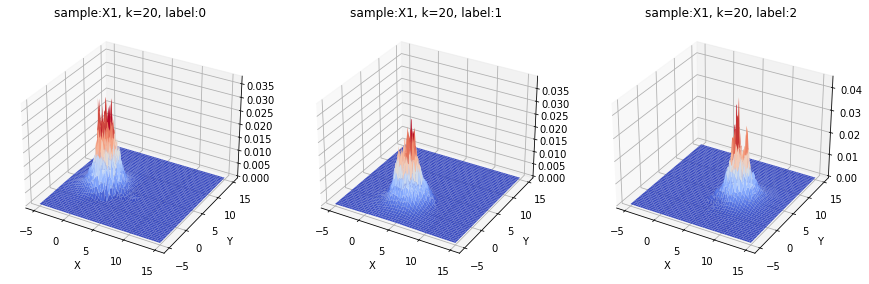

In [21]:
show_pic(k=20)

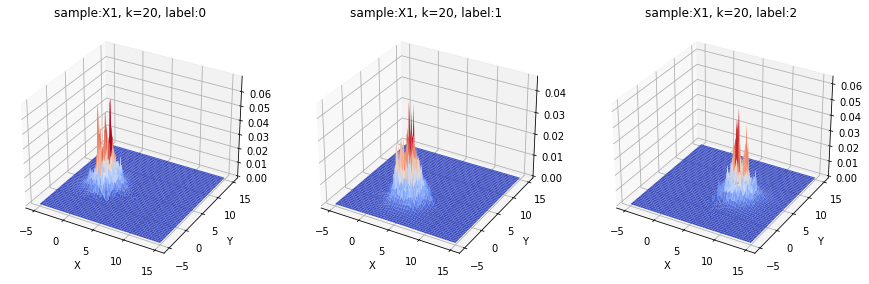

In [22]:
show_pic(k=10)

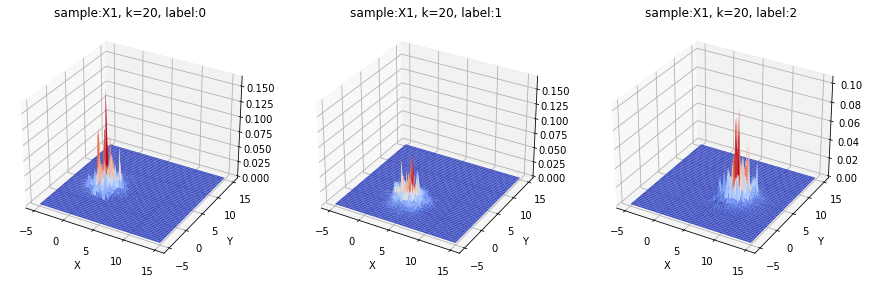

In [23]:
show_pic(k=5)